##**1.Import Necessary Libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error


##**2.Load tha dataset**

In [ ]:
# Load the dataset
file_path = '/content/1_Daily_minimum_temps.csv'
data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Display the first few rows
data.head()


<ipython-input-3-8a268b13a037>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [ ]:
data.dtypes

,0
Temp,object


In [ ]:
#convert object datatype in to integer using pd to numeric
data['Temp'] = pd.to_numeric(data['Temp'], errors='coerce')

In [ ]:
# check for missing values
data.isnull().sum()

,0
Temp,3


In [ ]:
data.shape

(3650, 1)

In [ ]:
#imputation for missing values
data['Temp'].fillna(data['Temp'].mean(), inplace=True)


<ipython-input-14-9980ceb7990d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Temp'].fillna(data['Temp'].mean(), inplace=True)


In [ ]:
data.isnull().sum()

,0
Temp,0


##**3.Visualize the time series**

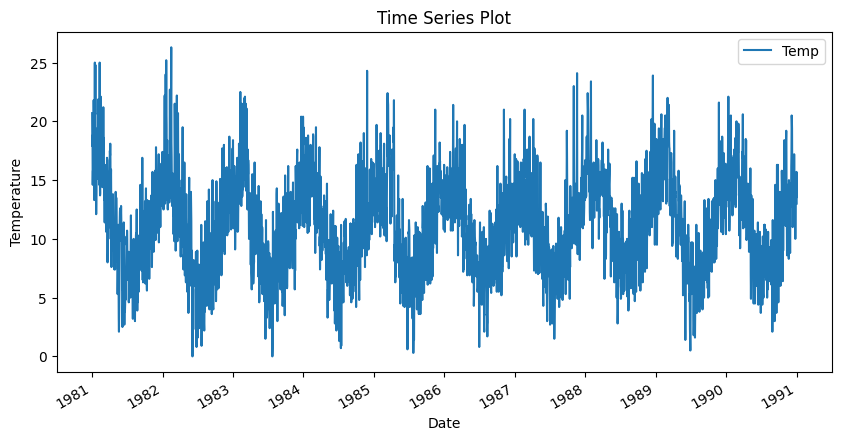

In [ ]:
# Plot the time series
data.plot(figsize=(10, 5), title="Time Series Plot", ylabel="Temperature")
plt.show()

##**4.Check for Stationarity**

In [ ]:
# ADF Test
result = adfuller(data['Temp'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is non-stationary.")


ADF Statistic: -4.422157284757489
p-value: 0.00027114821352988645
Critical Values: {'1%': -3.4321532327220154, '5%': -2.862336767636517, '10%': -2.56719413172842}
The time series is stationary.


##**5.Make the Series Stationary (if needed)**

In [ ]:
# Differencing to make the series stationary
data['Temp_diff'] = data['Temp'].diff()

# Drop NA values after differencing
data_diff = data['Temp_diff'].dropna()

# Plot the differenced series
data_diff.plot(figsize=(10, 5), title="Differenced Time Series", ylabel="Temperature Difference")
plt.show()


##**6.Partial Autocorrelation Plot**

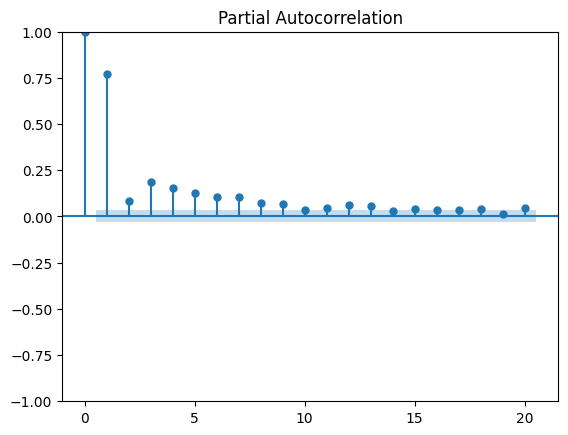

In [ ]:
# Plot the PACF
plot_pacf(data, lags=20, method='ywm')
plt.show()

##**7.Train-Test Split**
Split the data such that the last 7 days are used as the test set

In [ ]:
# Train-test split
train = data.iloc[:-7]['Temp']
test = data.iloc[-7:]['Temp']

print("Train size:", len(train))
print("Test size:", len(test))

Train size: 3643
Test size: 7


##**8.Build and Train the AR Model**

In [ ]:
# Create and train the AR model
model = AutoReg(train, lags=10).fit()

# Print model summary
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   Temp   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8391.999
Method:               Conditional MLE   S.D. of innovations              2.438
Date:                Sat, 25 Jan 2025   AIC                          16807.998
Time:                        07:07:08   BIC                          16882.372
Sample:                            10   HQIC                         16834.491
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9483      0.143      6.633      0.000       0.668       1.229
Temp.L1        0.6001      0.017     36.182      0.000       0.568       0.633
Temp.L2       -0.0750      0.019     -3.884      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


##**9.Make Predictions**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


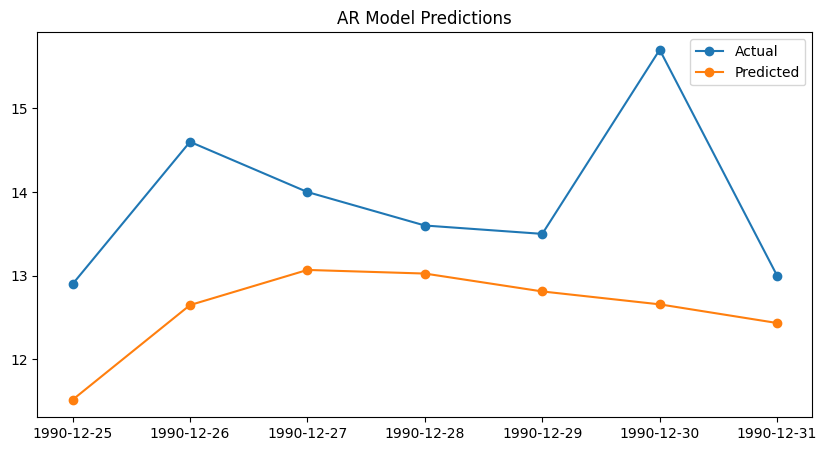

Test RMSE: 1.5566176477622145


In [ ]:
# Predictions on the test set
predictions = model.predict(start=len(train), end=len(train) + len(test) - 1)

# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label="Actual", marker='o')
plt.plot(test.index, predictions, label="Predicted", marker='o')
plt.legend()
plt.title("AR Model Predictions")
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predictions))
print("Test RMSE:", rmse)

##**10.Future Predictions**

In [ ]:
# Predict the next 7 days
future_predictions = model.predict(start=len(train) + len(test), end=len(train) + len(test) + 6)

# Print future predictions
print("Future Predictions:")
print(future_predictions)

Future Predictions:
3650    12.368279
3651    12.289635
3652    12.210477
3653    12.256491
3654    12.309923
3655    12.313190
3656    12.271682
dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
